In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

Data Preprocessing

In [2]:
data_path = r"C:\Users\trush\OneDrive\Documents\WFU Grad School Info\BAN 6025 Machine Learning\Organics Project\organics.csv"
organic_df = pd.read_csv(data_path)
organic_df = organic_df.drop(columns=['ID'])
organic_df.head()

DemAffl  DemAge  DemCluster DemClusterGroup DemGender    DemReg  \
0     10.0    76.0        16.0               C         U  Midlands   
1      4.0    49.0        35.0               D         U  Midlands   
2      5.0    70.0        27.0               D         F  Midlands   
3     10.0    65.0        51.0               F         M  Midlands   
4     11.0    68.0         4.0               A         F  Midlands   

       DemTVReg PromClass  PromSpend  PromTime  TargetBuy  TargetAmt  
0  Wales & West      Gold   16000.00       4.0          0          0  
1  Wales & West      Gold    6000.00       5.0          0          0  
2  Wales & West    Silver       0.02       8.0          1          1  
3      Midlands       Tin       0.01       7.0          1          1  
4      Midlands       Tin       0.01       8.0          0          0

Find Missing Values

In [3]:
def find_missing(df):
    return (df.isna().sum() / len(df)) * 100

DemAge, DemCluster, DemClusterGroup, DemTVReg, DemReg: Cannot make an accurate estimation, so I am going to drop missing values

In [4]:
columns = ['DemAge', 'DemCluster', 'DemClusterGroup', 'DemTVReg', 'DemReg']
organic_df.dropna(subset=columns, inplace=True)
#organic_df = organic_df[organic_df['DemAge'].notna()]

DemAffl: Affluence Grade, I am going to fill the missing values with the mean

In [5]:
organic_df['DemAffl'] = organic_df['DemAffl'].fillna(np.mean(organic_df['DemAffl']))

PromTime: Fill with the mean

In [6]:
organic_df['PromTime'] = organic_df['PromTime'].fillna(np.mean(organic_df['PromTime']))

DemGender: There is an Unknown Column for Gender (U). Will fill na values with 'U'

In [7]:
organic_df['DemGender'] = organic_df['DemGender'].fillna('U')

In [8]:
find_missing(organic_df)

DemAffl            0.0
DemAge             0.0
DemCluster         0.0
DemClusterGroup    0.0
DemGender          0.0
DemReg             0.0
DemTVReg           0.0
PromClass          0.0
PromSpend          0.0
PromTime           0.0
TargetBuy          0.0
TargetAmt          0.0
dtype: float64

Distribution of Classes

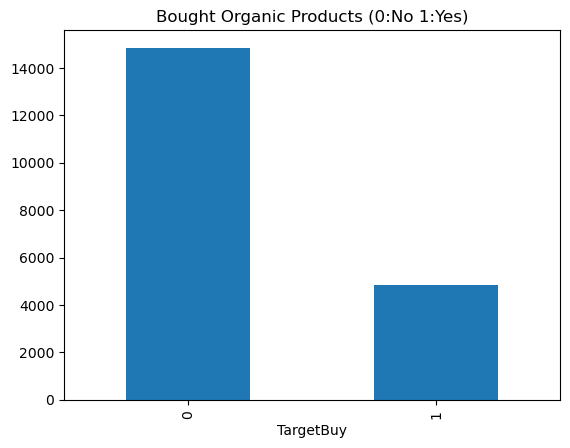

In [9]:
class_counts = organic_df['TargetBuy'].value_counts()
class_counts.plot(kind='bar')
plt.title('Bought Organic Products (0:No 1:Yes)')
plt.show()

Correlation Matrix for Numeric Variables

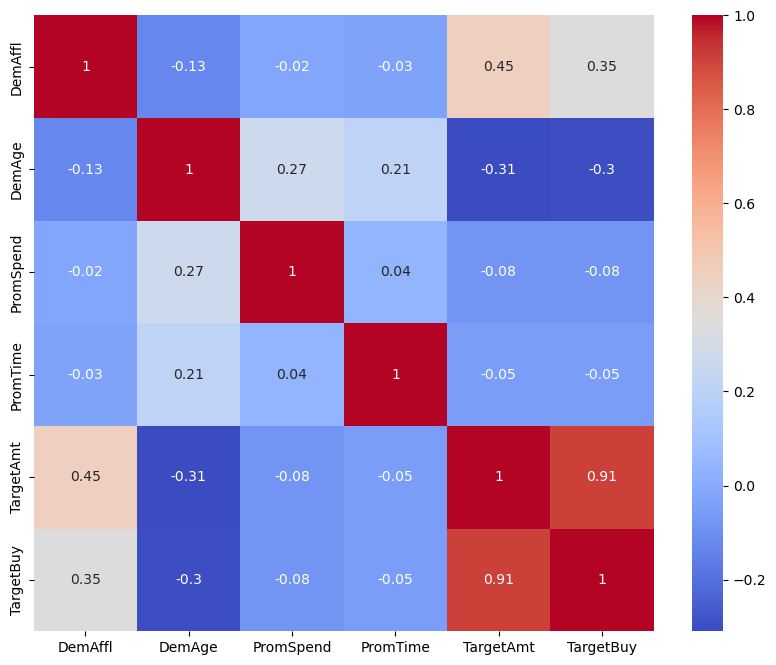

In [10]:
numeric = ['DemAffl', 'DemAge', 'PromSpend', 'PromTime', 'TargetAmt', 'TargetBuy']
numeric_variables = organic_df[numeric]

correlation_matrix = numeric_variables.corr().round(2)

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
organic_df = organic_df.drop(columns=['TargetAmt'])

Bar Plots for Nominal Data

<Figure size 1000x800 with 0 Axes>

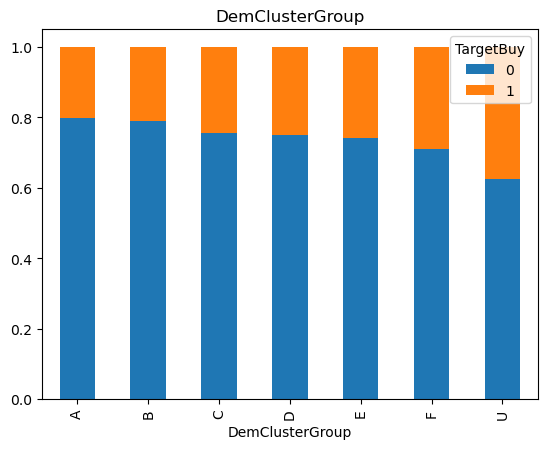

<Figure size 1000x800 with 0 Axes>

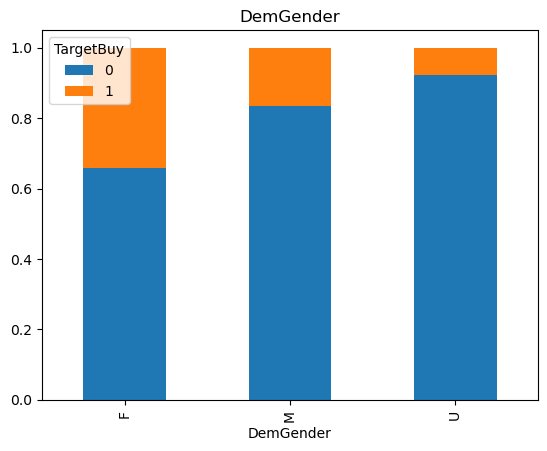

<Figure size 1000x800 with 0 Axes>

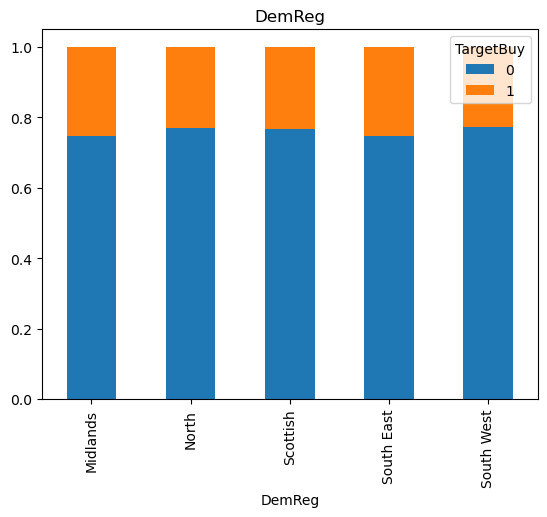

<Figure size 1000x800 with 0 Axes>

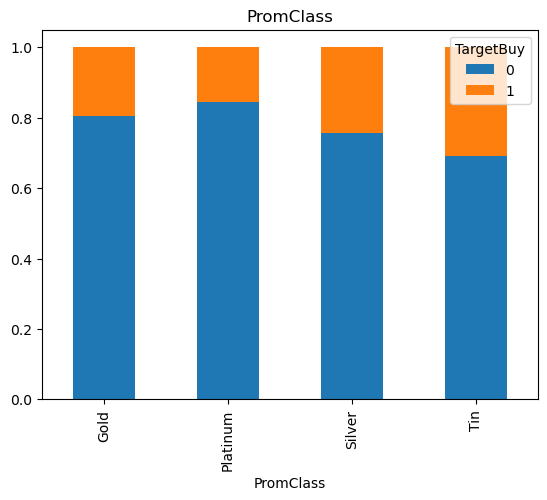

<Figure size 1000x800 with 0 Axes>

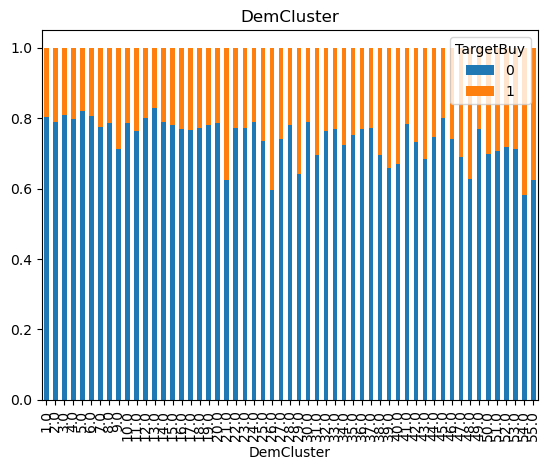

<Figure size 1000x800 with 0 Axes>

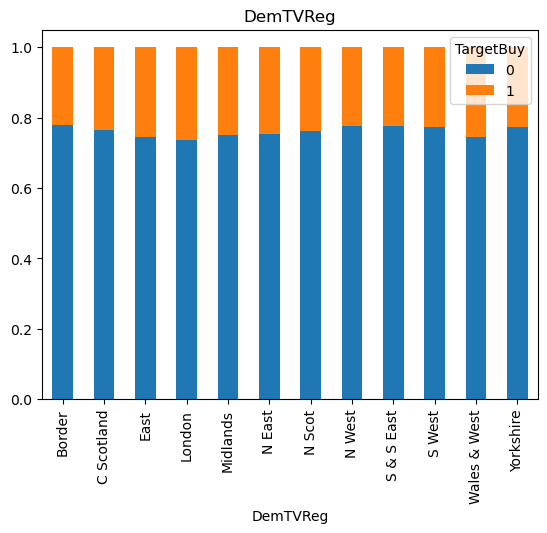

In [12]:
nominal_columns = ['DemClusterGroup', 'DemGender', 'DemReg', 'PromClass', 'DemCluster', 'DemTVReg']


for column in nominal_columns:
    plt.figure(figsize=(10,8))
    category_target = organic_df.groupby(column)['TargetBuy'].value_counts(normalize=True).unstack()
    category_target.plot(kind='bar', stacked=True)
    plt.title(column)
    plt.show()

Full Model 

In [13]:
X = organic_df.drop(columns=['TargetBuy'])
y = organic_df['TargetBuy']

X = pd.get_dummies(X, columns=nominal_columns, drop_first=True, dtype='float')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69, stratify=y)


# CatBoost

![alt text](cat.jpg)

In [14]:
cat_boost = CatBoostClassifier(iterations=500, learning_rate=0.03, depth=6, random_state=69)
cat_boost.fit(X_train, y_train)

0:	learn: 0.6761993	total: 166ms	remaining: 1m 22s
1:	learn: 0.6575475	total: 174ms	remaining: 43.2s
2:	learn: 0.6411640	total: 181ms	remaining: 30s
3:	learn: 0.6250642	total: 190ms	remaining: 23.6s
4:	learn: 0.6104669	total: 200ms	remaining: 19.8s
5:	learn: 0.5970571	total: 208ms	remaining: 17.1s
6:	learn: 0.5832590	total: 216ms	remaining: 15.2s
7:	learn: 0.5711789	total: 224ms	remaining: 13.8s
8:	learn: 0.5619203	total: 231ms	remaining: 12.6s
9:	learn: 0.5510852	total: 239ms	remaining: 11.7s
10:	learn: 0.5425129	total: 247ms	remaining: 11s
11:	learn: 0.5339004	total: 255ms	remaining: 10.4s
12:	learn: 0.5274202	total: 263ms	remaining: 9.85s
13:	learn: 0.5197418	total: 271ms	remaining: 9.41s
14:	learn: 0.5139074	total: 279ms	remaining: 9.02s
15:	learn: 0.5084687	total: 287ms	remaining: 8.68s
16:	learn: 0.5033954	total: 295ms	remaining: 8.37s
17:	learn: 0.4971385	total: 302ms	remaining: 8.09s
18:	learn: 0.4914178	total: 308ms	remaining: 7.79s
19:	learn: 0.4858713	total: 315ms	remaining:

In [15]:
cb_train_pred = cat_boost.predict(X_train)
cb_test_pred = cat_boost.predict(X_test)

cb_train_prob = cat_boost.predict_proba(X_train)
cb_test_prob = cat_boost.predict_proba(X_test)

In [17]:
def metrics(y, x):
    print(f'Accuracy: {accuracy_score(y,x)}')
    print(f'Precision: {precision_score(y,x)}')
    print(f'Recall: {recall_score(y,x)}')
    print(f'F1 Score: {f1_score(y,x)}')

In [32]:
print('Train Set')
metrics(y_train, cb_train_pred)

print('Test Set')
metrics(y_test, cb_test_pred)

Train Set
Accuracy: 0.8382465057179161
Precision: 0.76050753370341
Recall: 0.4968911917098446
F1 Score: 0.6010654967094955
Test Set
Accuracy: 0.8170731707317073
Precision: 0.6978998384491115
Recall: 0.44766839378238343
F1 Score: 0.5454545454545454


# CatBoost Tuned

Warning, this took me 23 minutes to run!

![alt text](627d0cbe0c5bbd447a635839_new-kitten-checklist.jpg)

In [26]:
cb_tune = CatBoostClassifier()

param_grid = {
    'iterations': [150, 250, 500, 750],
    'learning_rate': [0.001, 0.01, 0.03, 0.1],
    'depth': [None, 2, 4, 6]
}

grid_search = GridSearchCV(cb_tune, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')
print(f'Best Estimator {best_estimator}')

0:	learn: 0.6924855	total: 8.2ms	remaining: 1.22s
1:	learn: 0.6918305	total: 14.3ms	remaining: 1.05s
2:	learn: 0.6912029	total: 20.4ms	remaining: 1000ms
3:	learn: 0.6906360	total: 26.5ms	remaining: 968ms
4:	learn: 0.6900754	total: 32.9ms	remaining: 955ms
5:	learn: 0.6893643	total: 38.9ms	remaining: 934ms
6:	learn: 0.6887017	total: 44.9ms	remaining: 916ms
7:	learn: 0.6880856	total: 50.8ms	remaining: 901ms
8:	learn: 0.6874889	total: 56.7ms	remaining: 888ms
9:	learn: 0.6869717	total: 61.4ms	remaining: 859ms
10:	learn: 0.6863141	total: 67.5ms	remaining: 852ms
11:	learn: 0.6856796	total: 75.1ms	remaining: 864ms
12:	learn: 0.6850562	total: 81.7ms	remaining: 861ms
13:	learn: 0.6845288	total: 87.7ms	remaining: 852ms
14:	learn: 0.6839245	total: 93.7ms	remaining: 844ms
15:	learn: 0.6832697	total: 99.3ms	remaining: 831ms
16:	learn: 0.6826458	total: 105ms	remaining: 824ms
17:	learn: 0.6820124	total: 111ms	remaining: 813ms
18:	learn: 0.6814344	total: 117ms	remaining: 805ms
19:	learn: 0.6808229	tota

In [27]:
print(best_estimator.get_params())
best_estimator.fit(X_train, y_train)

{'depth': 4, 'iterations': 750, 'learning_rate': 0.03}
0:	learn: 0.6747340	total: 9.18ms	remaining: 6.87s
1:	learn: 0.6574145	total: 15.4ms	remaining: 5.76s
2:	learn: 0.6415361	total: 22.3ms	remaining: 5.56s
3:	learn: 0.6278168	total: 27.7ms	remaining: 5.17s
4:	learn: 0.6132663	total: 32.9ms	remaining: 4.9s
5:	learn: 0.5995467	total: 38ms	remaining: 4.71s
6:	learn: 0.5886140	total: 43.7ms	remaining: 4.64s
7:	learn: 0.5775714	total: 50.2ms	remaining: 4.65s
8:	learn: 0.5678816	total: 55.9ms	remaining: 4.6s
9:	learn: 0.5588372	total: 61.5ms	remaining: 4.55s
10:	learn: 0.5508442	total: 66.5ms	remaining: 4.47s
11:	learn: 0.5420759	total: 71.9ms	remaining: 4.42s
12:	learn: 0.5338871	total: 77.2ms	remaining: 4.38s
13:	learn: 0.5263138	total: 83.3ms	remaining: 4.38s
14:	learn: 0.5196683	total: 89.3ms	remaining: 4.38s
15:	learn: 0.5134968	total: 95.5ms	remaining: 4.38s
16:	learn: 0.5086420	total: 102ms	remaining: 4.38s
17:	learn: 0.5025398	total: 107ms	remaining: 4.34s
18:	learn: 0.4973881	tota

In [34]:
best_cb_train_pred = best_estimator.predict(X_train)
best_cb_test_pred = best_estimator.predict(X_test)

best_cb_train_prob = best_estimator.predict_proba(X_train)
best_cb_test_prob = best_estimator.predict_proba(X_test)

In [35]:
print('Train Set')
metrics(y_train, best_cb_train_pred)

print('Test Set')
metrics(y_test, best_cb_test_pred)

Train Set
Accuracy: 0.8327827191867853
Precision: 0.7440381558028617
Recall: 0.48497409326424873
F1 Score: 0.5872020075282308
Test Set
Accuracy: 0.8140243902439024
Precision: 0.6858054226475279
Recall: 0.44559585492227977
F1 Score: 0.5402010050251256


# Random Forest

In [46]:
random_forest = RandomForestClassifier(n_estimators=100, max_features=3, max_depth=None, min_samples_leaf=1, random_state=69)

random_forest.fit(X_train, y_train)

RandomForestClassifier(max_features=3, random_state=69)

In [47]:
rf_train_pred = random_forest.predict(X_train)
rf_test_pred = random_forest.predict(X_test)

rf_train_prob = random_forest.predict_proba(X_train)
rf_test_prob = random_forest.predict_proba(X_test)

In [48]:
print('Train Set')
metrics(y_train, rf_train_pred)

print('Test Set')
metrics(y_test, rf_test_pred)

Train Set
Accuracy: 0.9996188055908514
Precision: 0.9994815966822188
Recall: 0.9989637305699481
F1 Score: 0.9992225965275978
Test Set
Accuracy: 0.8074186991869918
Precision: 0.705765407554672
Recall: 0.36787564766839376
F1 Score: 0.48365122615803813


# Random Forest Tuned

In [14]:
rf_tune = RandomForestClassifier()

rf_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['sqrt', 2, 4, 6],
    'max_depth': [None, 5],
    'min_samples_leaf': [1, 50, 100]
}

rf_grid_search = GridSearchCV(rf_tune, rf_param_grid, cv=5, scoring='f1')
rf_grid_search.fit(X_train, y_train)

best_params = rf_grid_search.best_params_
best_estimator = rf_grid_search.best_estimator_

print(best_params)
print(best_estimator)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
RandomForestClassifier(n_estimators=200)


In [15]:
rf_best_estimator = best_estimator

best_rf_train_pred = rf_best_estimator.predict(X_train)
best_rf_test_pred = rf_best_estimator.predict(X_test)

best_rf_train_prob = rf_best_estimator.predict_proba(X_train)
best_rf_test_prob = rf_best_estimator.predict_proba(X_test)

In [18]:
print('Train Set')
metrics(y_train, best_rf_train_pred)

print('Test Set')
metrics(y_test, best_rf_test_pred)

Train Set
Accuracy: 0.9996188055908514
Precision: 0.9994815966822188
Recall: 0.9989637305699481
F1 Score: 0.9992225965275978
Test Set
Accuracy: 0.8104674796747967
Precision: 0.686541737649063
Recall: 0.41761658031088084
F1 Score: 0.5193298969072165


# Decision Tree

In [21]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=10, ccp_alpha=0.001)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=25,
                       min_samples_leaf=10)

In [22]:
dt_train_pred = decision_tree.predict(X_train)
dt_test_pred = decision_tree.predict(X_test)

dt_train_prob = decision_tree.predict_proba(X_train)
dt_test_prob = decision_tree.predict_proba(X_test)

In [45]:
print('Train Set')
metrics(y_train, dt_train_pred)

print('Test Set')
metrics(y_test, dt_test_pred)

Train Set
Accuracy: 0.819440914866582
Precision: 0.75
Recall: 0.3955958549222798
F1 Score: 0.51797829036635
Test Set
Accuracy: 0.8158028455284553
Precision: 0.7380952380952381
Recall: 0.3854922279792746
F1 Score: 0.5064669843430906


Visualize the Tree

In [24]:
dot_data = export_graphviz(decision_tree=decision_tree, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render('Decision_Tree_Default')

'Decision_Tree_Default.pdf'

Feature Importances for Decision Tree

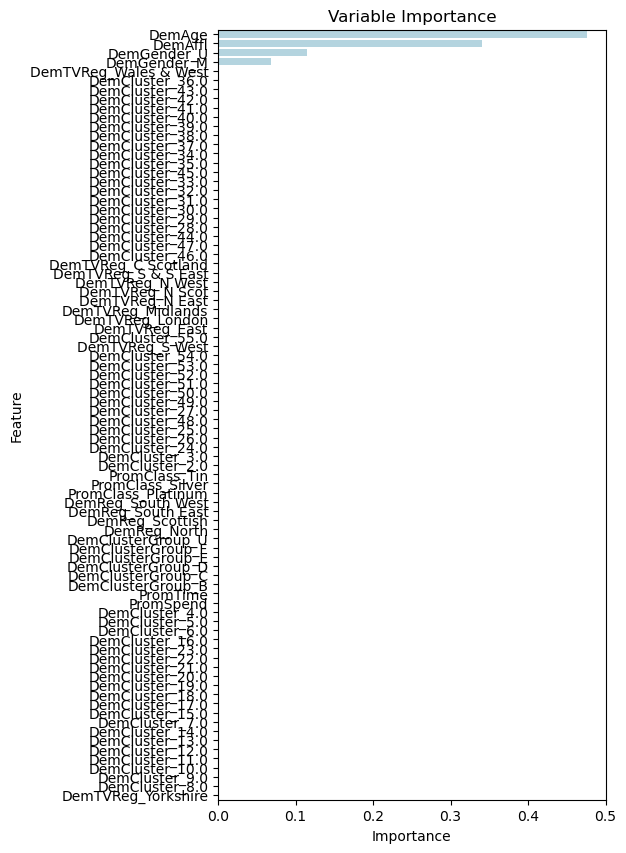

In [36]:
tree_imp = decision_tree.feature_importances_

column_values = ['importance']

df = pd.DataFrame(data=tree_imp, columns=column_values)
df['feature'] = X.columns

df.sort_values(by=['importance'], ascending=False, inplace=True)

plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df,
            y=df['feature'],
            x=df['importance'], color="lightblue")

plt.show()

# Decision Tree Tuned

In [37]:
dt_tuned = DecisionTreeClassifier()

dt_param_grid = {
    'criterion': ['entropy'],
    'max_depth': [None, 15, 20, 25],
    'min_samples_leaf': [5, 10, 15, 20], 
    'ccp_alpha': [0.001, 0.003, 0.01, 0.1]
}

dt_grid_search = GridSearchCV(dt_tuned, dt_param_grid, cv=5, scoring='f1')
dt_grid_search.fit(X_train, y_train)

dt_best_estimator = dt_grid_search.best_estimator_
dt_best_params = dt_grid_search.best_params_

print(f'Best Estimator {dt_best_estimator}')
print(f'Best params {dt_best_params}')

Best Estimator DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                       min_samples_leaf=15)
Best params {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 15}


In [39]:
dt_best_estimator.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                       min_samples_leaf=15)

In [40]:
best_dt_train_pred = dt_best_estimator.predict(X_train)
best_dt_test_pred = dt_best_estimator.predict(X_test)

best_dt_train_prob = dt_best_estimator.predict_proba(X_train)
best_dt_test_prob = dt_best_estimator.predict_proba(X_test)

In [44]:
print('Train Set')
metrics(y_train, best_dt_train_pred)

print('Test Set')
metrics(y_test, best_dt_test_pred)

Train Set
Accuracy: 0.819440914866582
Precision: 0.75
Recall: 0.3955958549222798
F1 Score: 0.51797829036635
Test Set
Accuracy: 0.8158028455284553
Precision: 0.7380952380952381
Recall: 0.3854922279792746
F1 Score: 0.5064669843430906


In [42]:
dot_data = export_graphviz(decision_tree=dt_best_estimator, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render('Decision_Tree_Tuned')

'Decision_Tree_Tuned.pdf'

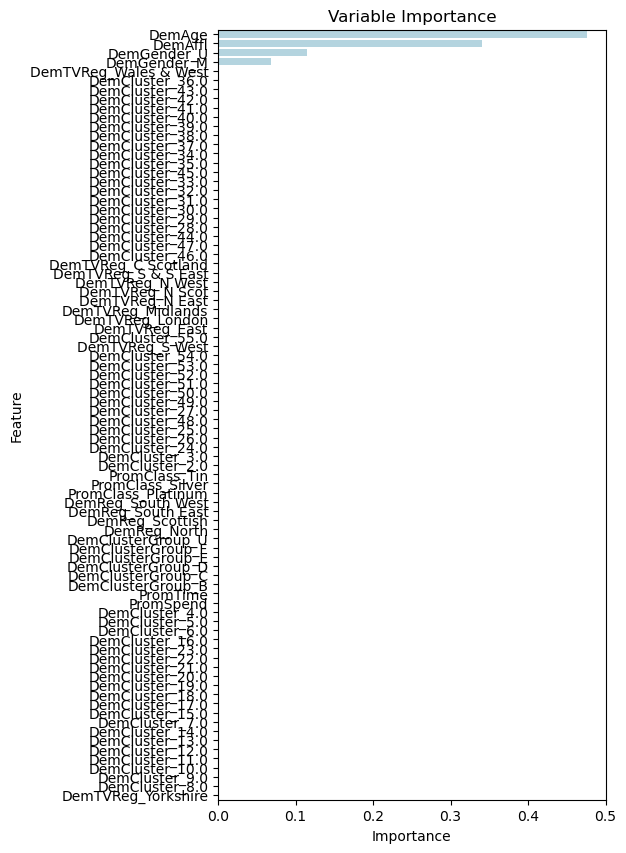

In [43]:
tree_imp = dt_best_estimator.feature_importances_

column_values = ['importance']

df = pd.DataFrame(data=tree_imp, columns=column_values)
df['feature'] = X.columns

df.sort_values(by=['importance'], ascending=False, inplace=True)

plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df,
            y=df['feature'],
            x=df['importance'], color="lightblue")

plt.show()